<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/Final_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
Unnamed: 0                     0
Gender                         0
Age                            0
Hemoglobin(g/dl)               0
Neutrophils(%)                 0
Lymphocytes(%)                 0
Monocytes(%)                   0
Eosinophils(%)                 0
RBC                            0
HCT(%)                         0
MCV(fl)                        0
MCH(pg)                        0
MCHC(g/dl)                     0
RDW-CV(%)                      0
Total Platelet Count(/cumm)    0
MPV(fl)                        0
PDW(%)                         0
PCT(%)                         0
Total WBC count(/cumm)         0
Result                         0
dtype: int64
Preprocessing completed. Preprocessed data saved to 'preprocessed_data.csv'.
Training and testing sets saved to 'X_train.csv', 'X_test.csv', 'y_train.csv', and 'y_test.csv'.
k = 1, Train Accuracy = 1.0000, Test Accuracy = 0.6464
k = 2, Train Accuracy = 0.8223, Test Accuracy = 0.5929
k = 3, Train

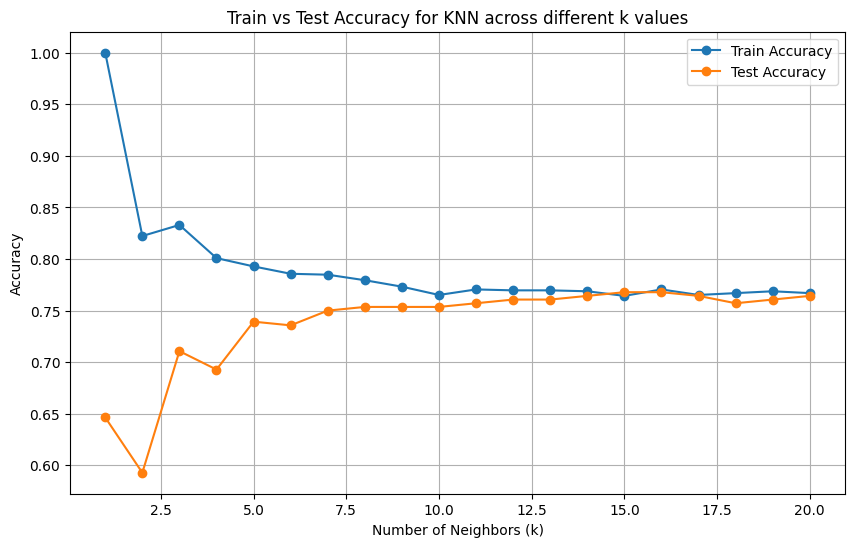


Best Hyperparameters from Grid Search:
{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

Optimized Model Evaluation:
Accuracy: 0.7714
Precision: 0.7836
Recall: 0.7714
F1-Score: 0.7363

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.33      0.48        87
           1       0.76      0.97      0.85       193

    accuracy                           0.77       280
   macro avg       0.80      0.65      0.66       280
weighted avg       0.78      0.77      0.74       280



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('dataset.csv')

# Encode the target variable 'Result' (0 for negative, 1 for positive)
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Separate features and target
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target

# Define categorical and numerical columns
categorical_cols = ['Gender']
numerical_cols = X.columns.difference(categorical_cols)

# Preprocessing pipeline
# 1. One-hot encode categorical data (Gender)
# 2. Scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # One-hot encode Gender
        ('num', StandardScaler(), numerical_cols)    # Scale numerical features
    ])

# Apply preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data back to a DataFrame
# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_feature_names, numerical_cols])

# Create a DataFrame with preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Add the target column back to the preprocessed data
X_preprocessed_df['Result'] = y.reset_index(drop=True)

# Save the preprocessed data to a new CSV file
X_preprocessed_df.to_csv('preprocessed_data.csv', index=False)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df.drop(columns=['Result']),  # Features
    X_preprocessed_df['Result'],                # Target
    test_size=0.2,                              # 20% testing
    random_state=40                            # For reproducibility
)

# Save the training and testing sets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Preprocessing completed. Preprocessed data saved to 'preprocessed_data.csv'.")
print("Training and testing sets saved to 'X_train.csv', 'X_test.csv', 'y_train.csv', and 'y_test.csv'.")

# Load the preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Drop any unnamed columns (if present)
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]
y_train = y_train.loc[:, ~y_train.columns.str.contains('^Unnamed')]
y_test = y_test.loc[:, ~y_test.columns.str.contains('^Unnamed')]

# Convert y_train and y_test to 1D arrays (required for scikit-learn)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Train KNN model and find the best k (from 1 to 20)
best_k = 1
best_accuracy = 0
train_accuracies = []
test_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"k = {k}, Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

print(f"\nBest k: {best_k} with Test Accuracy: {best_accuracy:.4f}")

# Train the final KNN model with the best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_knn.predict(X_test)
print("\nFinal Model Evaluation:")
evaluate_model(y_test, y_pred)

# Visualize the training and testing accuracies across epochs (k values)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 21), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for KNN across different k values')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Optimization using GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),  # Test k from 1 to 20
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)

# Train the optimized KNN model with the best hyperparameters
optimized_knn = grid_search.best_estimator_
optimized_knn.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_optimized = optimized_knn.predict(X_test)
print("\nOptimized Model Evaluation:")
evaluate_model(y_test, y_pred_optimized)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Load the trained model and preprocessor from the training step
# Assuming the best model is trained and saved earlier
final_knn = KNeighborsClassifier(n_neighbors=15)  # Best k from the previous code
final_knn.fit(X_train, y_train)  # Train with the best k

# Load the test dataset (which needs predictions)
test_df = pd.read_csv('test_dataset.csv')

# Ensure the ID column is present and separate it
test_ids = test_df['ID']
test_data = test_df.drop(columns=['ID'])  # Drop the ID column to keep only features

# Preprocessing the test dataset
categorical_cols = ['Gender']
numerical_cols = test_data.columns.difference(categorical_cols)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # One-hot encode Gender
        ('num', StandardScaler(), numerical_cols)    # Scale numerical features
    ])

# Apply preprocessing to the test data (this is the same transformation as done during training)
X_test_preprocessed = preprocessor.fit_transform(test_data)

# Convert the preprocessed data back to a DataFrame (same columns as before)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_feature_names, numerical_cols])
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

# Make predictions on the test data
y_test_pred = final_knn.predict(X_test_preprocessed_df)

# Create a DataFrame with the ID and predicted results
prediction_df = pd.DataFrame({
    'ID': test_ids,
    'Predicted_Result': y_test_pred
})

# Save the predictions to a new CSV file
prediction_df.to_csv('predicted_results.csv', index=False)

print("Predictions saved to 'predicted_results.csv'")


Predictions saved to 'predicted_results.csv'


In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 3.0 MB/s eta 0:00:00


Evaluating model: Logistic Regression
Mean Accuracy: 0.6345
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       777
           1       0.63      0.74      0.68       777

    accuracy                           0.65      1554
   macro avg       0.66      0.65      0.65      1554
weighted avg       0.66      0.65      0.65      1554

Evaluating model: SVM
Mean Accuracy: 0.7439
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       777
           1       0.76      0.92      0.83       777

    accuracy                           0.82      1554
   macro avg       0.83      0.82      0.81      1554
weighted avg       0.83      0.82      0.81      1554

Evaluating model: KNN
Mean Accuracy: 0.7239
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       777
           1       0

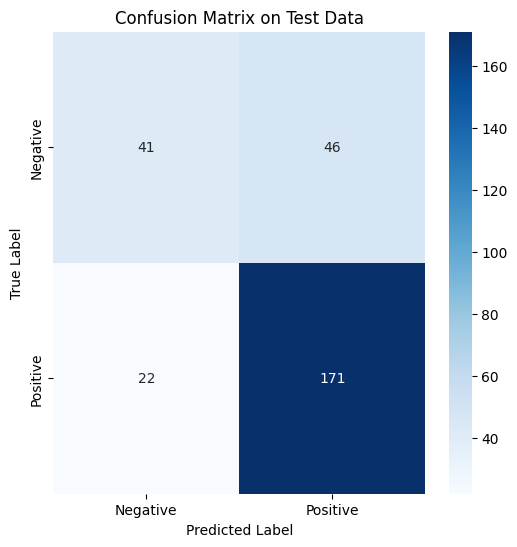

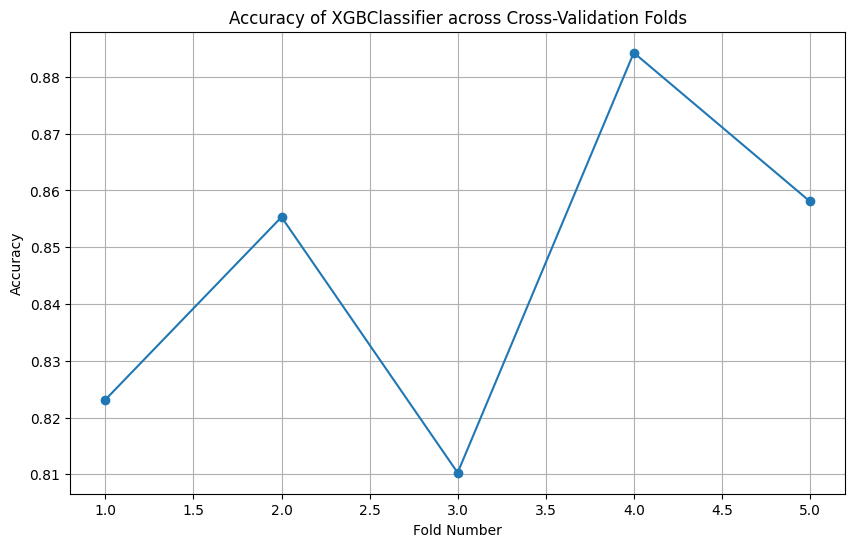

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the preprocessed training and testing data
X_train = pd.read_csv('X_train.csv')  # Features for training
y_train = pd.read_csv('y_train.csv')  # Target labels for training

X_test = pd.read_csv('X_test.csv')  # Features for testing
y_test = pd.read_csv('y_test.csv')  # Target labels for testing

# Convert y_train and y_test to 1D arrays if they're DataFrames
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Step 2: Apply SMOTE to balance the training classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert to DataFrame after resampling to maintain column names
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.Series(y_resampled)

# Step 3: Initialize Stratified K-Fold cross-validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize models
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42)),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Decision Tree': make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42)),
    'XGBoost': XGBClassifier(random_state=42)
}

# Step 5: Perform cross-validation and evaluate models
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    fold_accuracies = []  # Store accuracy for each fold

    for train_index, val_index in cv.split(X_resampled_df, y_resampled_df):
        X_train_cv, X_val_cv = X_resampled_df.iloc[train_index], X_resampled_df.iloc[val_index]
        y_train_cv, y_val_cv = y_resampled_df.iloc[train_index], y_resampled_df.iloc[val_index]

        # Train the model
        model.fit(X_train_cv, y_train_cv)

        # Predict on validation set
        y_val_pred = model.predict(X_val_cv)

        # Calculate accuracy
        fold_accuracy = accuracy_score(y_val_cv, y_val_pred)
        fold_accuracies.append(fold_accuracy)

    # Report results for this model
    mean_accuracy = np.mean(fold_accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_resampled_df, model.predict(X_resampled_df))}")
    print("="*50)

    # Store the best model based on accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = model

# Step 6: Evaluate the best model on the testing data
print("Evaluating the best model on the testing data")
y_test_pred = best_model.predict(X_test)

# Step 7: Calculate accuracy and classification report on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Classification Report:\n{classification_report(y_test, y_test_pred)}")

# Step 8: Confusion Matrix for testing data
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix on Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 9: Visualize Accuracy over Cross-validation folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), fold_accuracies, label='Fold Accuracy', marker='o')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title(f'Accuracy of {best_model.__class__.__name__} across Cross-Validation Folds')
plt.grid(True)
plt.show()
